In [10]:
from tools.functions import *
from generate_data import *

In [134]:
# Add two models to compare
output_model_0 = load_output("output_100_base")
output_model_1 = load_output("output_100_base_leak_x2")
output_model_2 = load_output("output_100_base_leak_x4")
output_model_3 = load_output("output_100_base_leak_x8")


model_identifyer = (
                "base",
                "leak_x2", 
                "leak_x4", 
                "leak_x8"
                )

outputs = (
        output_model_0, 
        output_model_1, 
        output_model_2, 
        output_model_3
        )


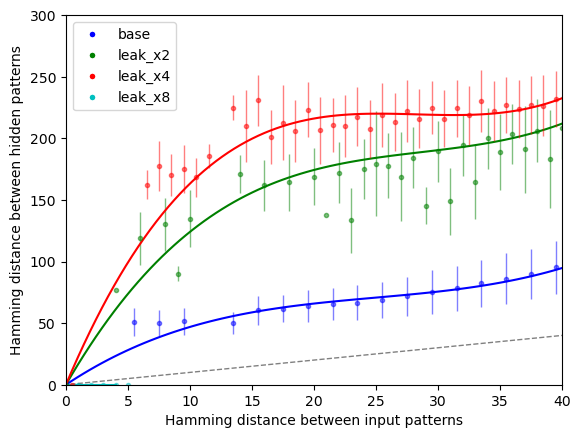

' plot_input_output_curves(outputs, model_identifyer, alpha = 0.5, order_of_model = 3, \n                        off_time = 1, plot_3rd_order = True, plot_error_bars=True, binarize=True, \n                        threshold=[80, 150, 150, 150], \n                        go_through_origin=True,\n                        split = (0.7,1), ylimit = (0, 300), xlimit = (0, 40)) '

In [164]:
# If binarzed and thresholds are set right, the results differ a lot!

""" plot_input_output_curves(outputs, model_identifyer, alpha = 0.5, order_of_model = 3, 
                        off_time = 1, plot_3rd_order = True, plot_error_bars=True, binarize=True, 
                        threshold=[100, 150, 200, 250], 
                        go_through_origin=True,
                        split = (0,0.3), ylimit = (0, 300), xlimit = (0, 40)) """

""" plot_input_output_curves(outputs, model_identifyer, alpha = 0.5, order_of_model = 3, 
                        off_time = 1, plot_3rd_order = True, plot_error_bars=True, binarize=True, 
                        threshold=[90, 150, 150, 150], 
                        go_through_origin=True,
                        split = (0.3,0.7), ylimit = (0, 300), xlimit = (0, 40)) """

""" plot_input_output_curves(outputs, model_identifyer, alpha = 0.5, order_of_model = 3, 
                        off_time = 1, plot_3rd_order = True, plot_error_bars=True, binarize=True, 
                        threshold=[80, 150, 150, 150], 
                        go_through_origin=True,
                        split = (0.7,1), ylimit = (0, 300), xlimit = (0, 40)) """

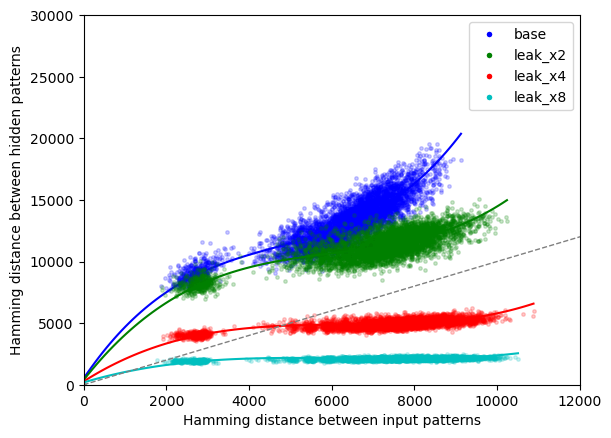

In [165]:
plot_input_output_curves(outputs, model_identifyer, alpha = 0.2,
                        off_time = 1, 
                        plot_3rd_order = True, 
                        plot_error_bars=False, 
                        binarize=False, 
                        go_through_origin=False,
                        split = (0,0.2), ylimit = (0, 30000), xlimit = (0, 12000))

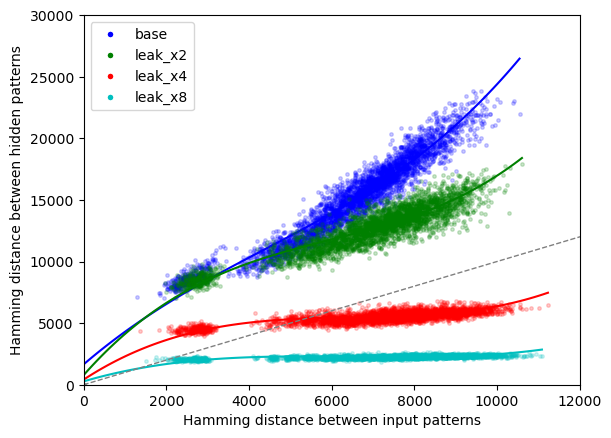

In [166]:
plot_input_output_curves(outputs, model_identifyer, alpha = 0.2, order_of_model = 3, 
                        off_time = 1, plot_3rd_order = True, plot_error_bars=False, binarize=False, 
                        go_through_origin=False,
                        split = (0.2,0.4), ylimit = (0, 30000), xlimit = (0, 12000))

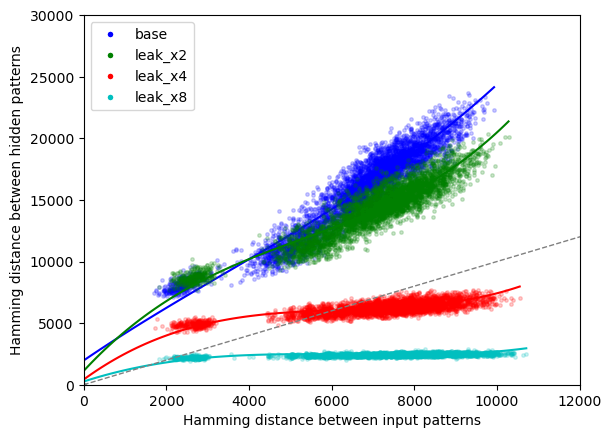

In [167]:
plot_input_output_curves(outputs, model_identifyer, alpha = 0.2, order_of_model = 3, 
                        off_time = 1, plot_3rd_order = True, plot_error_bars=False, binarize=False, 
                        go_through_origin=False,
                        split = (0.4,0.6), ylimit = (0, 30000), xlimit = (0, 12000))

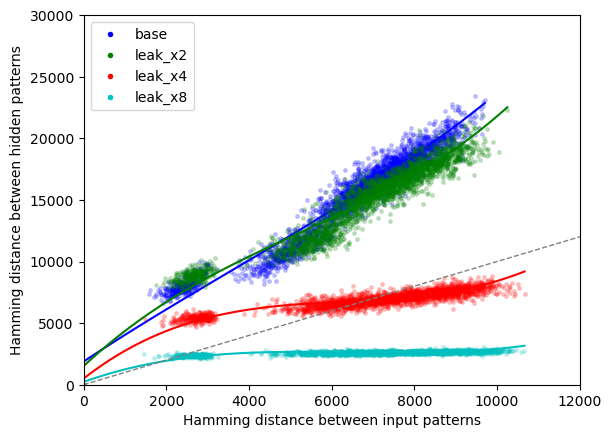

In [168]:
plot_input_output_curves(outputs, model_identifyer, alpha = 0.2, order_of_model = 3, 
                        off_time = 1, plot_3rd_order = True, plot_error_bars=False, binarize=False, 
                        go_through_origin=False,
                        split = (0.6,0.8), ylimit = (0, 30000), xlimit = (0, 12000))

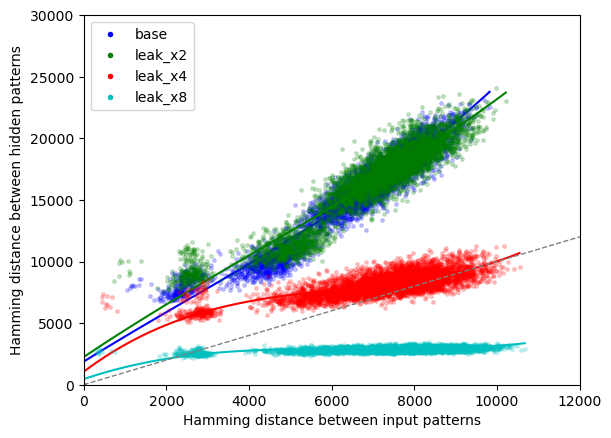

In [169]:
plot_input_output_curves(outputs, model_identifyer, alpha = 0.2, order_of_model = 3, 
                        off_time = 1, plot_3rd_order = True, plot_error_bars=False, binarize=False, 
                        go_through_origin=False,
                        split = (0.8,1), ylimit = (0, 30000), xlimit = (0, 12000))

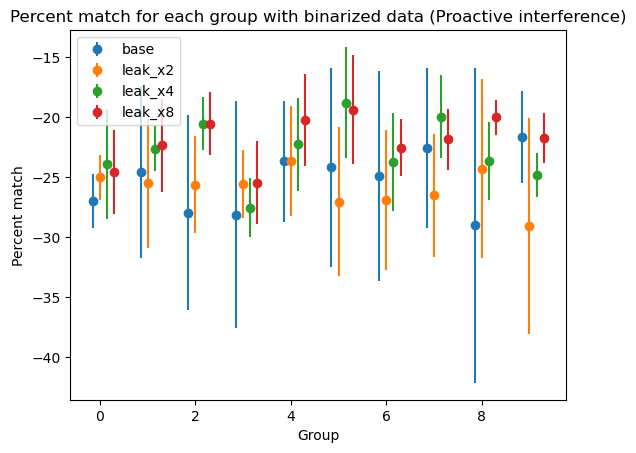

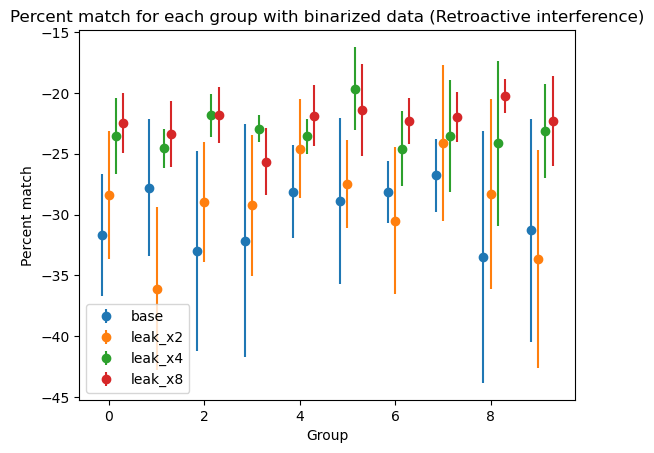

In [ ]:
# This calculates the hamming distances and percent match for all test patterns. 
# It uses the spike moitor ant the timepoints where the stimuli are presented
off_time = 1 # How many stimulus periods are used for recoverey period histogram

threshold = [100, 150, 200]
binarize = False

space = -0.15
j = 0
for output in outputs:
    Mv_loaded = output["Mv"]
    Mh_loaded = output["Mh"]
    time_test_on = output["time_test_on"]
    time_points_dict = output["time_points_dict"]
    n_seed_patterns = output["n_seed_patterns"]
    n_prototype_per_seed = output["n_prototype_per_seed"]
    n_variations_per_prototype = output["n_variations_per_prototype"]
    after_split_n_per_prototype_test = output["after_split_n_per_prototype_test"]

    hamming_distances, percent_match, originals, recovered = hamming_distances_test(Mv_loaded, time_test_on, time_points_dict, off_time=off_time, 
                                                                                    binarize = binarize, threshold = threshold)
    hd_table_between = np.array(hamming_distances[:10 * after_split_n_per_prototype_test * n_seed_patterns]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
    pm_table_between = np.array(percent_match[:10 * after_split_n_per_prototype_test * n_seed_patterns]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
    means_between = np.mean(pm_table_between, axis=1)
    stds_between = np.std(pm_table_between, axis=1)

    plt.errorbar(np.arange(10)+space, means_between, stds_between, linestyle='None', marker='o')
    plt.xlabel("Group")
    plt.ylabel("Percent match")
    plt.title("Percent match for each group with binarized data (Proactive interference)")
    #plt.ylim(0.5, 1)
    space += 0.15

    ## This is probably wrong!
    """ tst = pattern_separation_efficacy_model(Mv_loaded, Mh_loaded, time_points_dict, n_seed_patterns, 
                                        n_prototype_per_seed, after_split_n_per_prototype_test, time_test_on,
                                        selection = "group", convert_to_hz=True, to_binary=binarize, threshold=threshold, report=False)
    pattern_separation = np.mean(np.mean(tst, axis=0)[np.mean(tst, axis=0) != 0])
    print("Pattern separation efficacy: " + model_identifyer[j] + " " + str(pattern_separation)) """

    j += 1
plt.legend(model_identifyer)  
plt.show()


# Second plot 

space = -0.15
for output in outputs:
    Mv_loaded = output["Mv"]
    Mh_loaded = output["Mh"]
    time_test_on = output["time_test_on"]
    time_points_dict = output["time_points_dict"]
    n_seed_patterns = output["n_seed_patterns"]
    n_prototype_per_seed = output["n_prototype_per_seed"]
    n_variations_per_prototype = output["n_variations_per_prototype"]
    after_split_n_per_prototype_test = output["after_split_n_per_prototype_test"]

    hamming_distances, percent_match, originals, recovered = hamming_distances_test(Mv_loaded, time_test_on, time_points_dict, off_time=off_time, 
                                                                                    binarize = binarize, threshold = threshold)

    hd_table_within = np.array(hamming_distances[10 * after_split_n_per_prototype_test * n_seed_patterns:]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
    pm_table_within = np.array(percent_match[10 * after_split_n_per_prototype_test * n_seed_patterns:]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
    means_within = np.mean(pm_table_within, axis=1)
    stds_within = np.std(pm_table_within, axis=1)

    plt.errorbar(np.arange(10)+space, means_within, stds_within, linestyle='None', marker='o')
    plt.xlabel("Group")
    plt.ylabel("Match")
    plt.title("Match for each group (Retroactive interference)")
    #plt.ylim(0.5, 1)
    space += 0.15
plt.legend(model_identifyer)
plt.show()

